# Assignment 1

## Import Libraries

In [1]:
import nltk
from nltk.corpus import brown
from nltk import bigrams, ngrams, trigrams 
from collections import Counter
import re
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Pre-process data

In [3]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [2]:
def clean(sent_list):
    sent_list = [i.lower() for i in sent_list]
    sent_pre = [re.sub('[^A-Za-z]', '', i) for i in sent_list]
    return [i for i in sent_pre if i != '']

In [3]:
corpus_preproc = [clean(i) for i in brown.sents()[:40000]]

## Models

In [4]:
def unigram_model(corpus):
    unigrams = [j for i in corpus for j in i]
    unigrams_count = Counter(unigrams)
    unig_count['<s>'] = 40000
    unig_count['</s>'] = 40000
    unigrams_count = {i:unigrams_count[i]/len(unigrams) for i in unigrams_count}
    return unigrams_count

def bigram_model(corpus):
    model = {}
    for i in corpus:
        for w1, w2 in ngrams(i, 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'):
            if w1 not in model:
                model[w1] = []
            model[w1].append(w2)
    model = {i:Counter(model[i]) for i in model}
    model = {i:{j:model[i][j]/sum(model[i].values()) for j in model[i]} for i in model}
    return model

def trigram_model(corpus):
    model = {}
    for i in corpus:
        for w1, w2, w3 in ngrams(i, 3, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'):
            if (w1, w2) not in model:
                model[(w1, w2)] = []
            model[(w1, w2)].append(w3)
    model = {i:Counter(model[i]) for i in model}
    model = {i:{j:model[i][j]/sum(model[i].values()) for j in model[i]} for i in model}
    return model

In [5]:
unigram_brown = unigram_model(corpus_preproc)
bigram_brown = bigram_model(corpus_preproc)
trigram_brown = trigram_model(corpus_preproc)

## Ziph's law

### Unigram

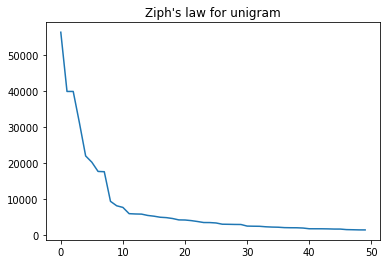

In [48]:
unigrams = [j for i in corpus_preproc for j in i]
unig_count = Counter(unigrams)
unig_count['<s>'] = 40000
unig_count['</s>'] = 40000
unig_count = list(reversed(sorted(unig_count.items(), key = itemgetter(1))))

unig = [i[0] for i in unig_count[:10]]
y_pos = list(range(10))
freq = [i[1] for i in unig_count[:10]]

#plt.figure(figsize=(20,10))
# plt.bar(y_pos, freq, align='center', alpha=0.5)
# plt.xticks(y_pos, unig)
# plt.ylabel('frequency')
plt.title("Ziph's law for unigram")
plt.plot([i[1] for i in unig_count[:50]])
plt.show()

### Bigram

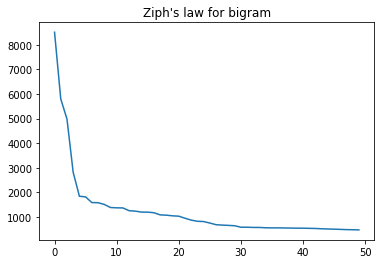

In [44]:
bigrams = []
for i in corpus_preproc:
    bigrams += [i for i in ngrams(i, 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>')]
bigrams = [(' ' if j is None else j for j in i) if (None in i) else i for i in bigrams]
bi_count = Counter(bigrams)
bi_count = list(reversed(sorted(bi_count.items(), key = itemgetter(1))))

unig = [i[0] for i in bi_count[:10]]
y_pos = list(range(10))
freq = [i[1] for i in bi_count[:10]]

# plt.figure(figsize=(20,10))
# plt.bar(y_pos, freq, align='center', alpha=0.5)
# plt.xticks(y_pos, unig)
# plt.ylabel('frequency')
plt.title("Ziph's law for bigram")
plt.plot([i[1] for i in bi_count[:50]])
plt.show()

### Trigram

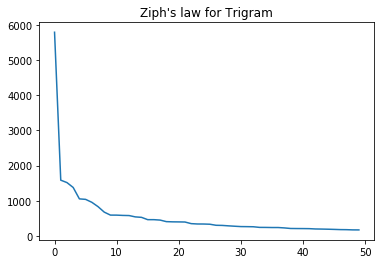

In [46]:
trigrams = []
for i in corpus_preproc:
    trigrams += [i for i in ngrams(i, 3, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>')]
trigrams = [(' ' if j is None else j for j in i) if (None in i) else i for i in trigrams]
tri_count = Counter(trigrams)
tri_count = list(reversed(sorted(tri_count.items(), key = itemgetter(1))))

tri = [i[0] for i in tri_count[:10]]
y_pos = list(range(10))
freq = [i[1] for i in tri_count[:10]]

# plt.figure(figsize=(20,10))
# plt.bar(y_pos, freq, align='center', alpha=0.5)
# plt.xticks(y_pos, tri)
# plt.ylabel('frequency')
plt.title("Ziph's law for Trigram")

# plt.show()

plt.plot([i[1] for i in tri_count[:50]])
plt.show()

## Top 10

### Unigrams

In [49]:
for i, j in unig_count[:10]:
    print(i, j)

the 56448
</s> 40000
<s> 40000
of 31276
and 22092
to 20341
a 17780
in 17705
is 9474
that 8240


### Bigrams

In [45]:
for i, j in bi_count[:10]:
    print(i, j)

('of', 'the') 8508
('<s>', 'the') 5798
('in', 'the') 4985
('to', 'the') 2819
('and', 'the') 1848
('on', 'the') 1821
('for', 'the') 1591
('<s>', 'in') 1585
('<s>', 'it') 1516
('it', 'is') 1390


### Trigrams

In [53]:
for i, j in tri_count[:10]:
    print(i, j)

('<s>', '<s>', 'the') 5798
('<s>', '<s>', 'in') 1585
('<s>', '<s>', 'it') 1516
('<s>', '<s>', 'he') 1377
('<s>', '<s>', 'this') 1052
('<s>', '<s>', 'but') 1038
('<s>', '<s>', 'a') 955
('<s>', '<s>', 'and') 831
('<s>', '<s>', 'i') 675
('<s>', '<s>', 'they') 590


## Testing

In [34]:
f = open("test_examples.txt",'r')
test = [i. strip() for i in f.readlines()]
test_clean = [clean(i.split()) for i in test]
test_clean

[['he', 'lived', 'a', 'good', 'life'],
 ['the', 'man', 'was', 'happy'],
 ['the', 'person', 'was', 'good'],
 ['the', 'girl', 'was', 'sad'],
 ['he', 'won', 'the', 'war']]

In [41]:
print('For Unigram')
for sent in test_clean:
    try:
        prob = np.prod([unigram_brown[j] for j in sent])
        print('\nFor sentence..', ' '.join(sent) ,'\nprobability:', prob,' \tlog-likelihood:', np.log10(prob),'\t Perplexity:',(1/prob)**(1/len(sent)))
    except:
        print('\nFor sentence..', ' '.join(sent) ,'\nprobability:', prob,' \tlog-likelihood: Inf\tPerplexity:Inf')

For Unigram

For sentence.. he lived a good life 
probability: 6.31579394802e-15  	log-likelihood: -14.1995720472 	 Perplexity: 691.69463863

For sentence.. the man was happy 
probability: 3.83848564498e-11  	log-likelihood: -10.4158400792 	 Perplexity: 401.753824571

For sentence.. the person was good 
probability: 7.51041309361e-11  	log-likelihood: -10.1243361749 	 Perplexity: 339.691002502

For sentence.. the girl was sad 
probability: 1.50611135001e-12  	log-likelihood: -11.8221429186 	 Perplexity: 902.683968749

For sentence.. he won the war 
probability: 2.00987358508e-11  	log-likelihood: -10.6968312575 	 Perplexity: 472.288982341


In [42]:
print('For Bigram')
for sent in test_clean:
    try:
        prob = np.prod([bigram_brown[i][j] for i, j in ngrams(sent, 2, pad_left=True, pad_right=True)])
        print('\nFor sentence..', ' '.join(sent) ,'\nprobability:', prob,' \tlog-likelihood:', np.log10(prob),'\tPerplexity:',(1/prob)**(1/len(sent)))
    except:
        print('\nFor sentence..', ' '.join(sent) ,'\nprobability:', prob,' \tlog-likelihood: Inf\tPerplexity:Inf')

For Bigram

For sentence.. he lived a good life 
probability: 2.37783822206e-12  	log-likelihood: -11.6238176963 	Perplexity: 211.233861956

For sentence.. the man was happy 
probability: 2.88943840323e-10  	log-likelihood: -9.53918655935 	Perplexity: 242.547409099

For sentence.. the person was good 
probability: 1.70995361896e-11  	log-likelihood: -10.7670156693 	Perplexity: 491.760812118

For sentence.. the girl was sad 
probability: 1.70995361896e-11  	log-likelihood: Inf	Perplexity:Inf

For sentence.. he won the war 
probability: 8.28700074926e-10  	log-likelihood: -9.08160262189 	Perplexity: 186.380578535


In [43]:
print('For Trigram')
for sent in test_clean:
    try:
        prob = np.prod([trigram_brown[(i, j)][k] for i, j, k in ngrams(sent, 2, pad_left=True, pad_right=True)])
        print('\nFor sentence..', ' '.join(sent) ,'\nprobability:', prob,' \tlog-likelihood:', np.log10(prob),'\tPerplexity:',(1/prob)**(1/len(sent)))
    except:
        print('\nFor sentence..', ' '.join(sent) ,'\nprobability:', prob,' \tlog-likelihood: Inf\tPerplexity:Inf')

For Trigram

For sentence.. he lived a good life 
probability: 8.28700074926e-10  	log-likelihood: Inf	Perplexity:Inf

For sentence.. the man was happy 
probability: 8.28700074926e-10  	log-likelihood: Inf	Perplexity:Inf

For sentence.. the person was good 
probability: 8.28700074926e-10  	log-likelihood: Inf	Perplexity:Inf

For sentence.. the girl was sad 
probability: 8.28700074926e-10  	log-likelihood: Inf	Perplexity:Inf

For sentence.. he won the war 
probability: 8.28700074926e-10  	log-likelihood: Inf	Perplexity:Inf
